<a href="https://colab.research.google.com/github/AzlinRusnan/Python-Coding/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Read in the Iris data
file_path = '/content/gdrive/MyDrive/Iris.csv'
iris = pd.read_csv(file_path)
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# How many data are included in this dataset?
#iris.shape
print("Number of dataset: ", len(iris))

Number of dataset:  150


In [7]:
# Check the iris data types
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
#Find the NaN values in the data
#iris.info()
# Check for missing values
print(iris.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
#Data Manipulation

In [10]:
#Create a new column named sepal_area by multiplying the sepal_length and sepal_width columns.
iris['sepal_area'] = iris['SepalLengthCm']*iris['SepalWidthCm']
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_area
0,1,5.1,3.5,1.4,0.2,Iris-setosa,17.85
1,2,4.9,3.0,1.4,0.2,Iris-setosa,14.70
2,3,4.7,3.2,1.3,0.2,Iris-setosa,15.04
3,4,4.6,3.1,1.5,0.2,Iris-setosa,14.26
4,5,5.0,3.6,1.4,0.2,Iris-setosa,18.00


In [12]:
#Categorize the sepal_length into three categories (Short, Medium, Long). Use the following bins: Short (<5.0), Medium (5.0-6.4), Long (>6.4). Create a new column
bins = [0,5.0,6.4,float('inf')]
labels = ['Short','Medium','Long']
iris['sepal_length_category'] = pd.cut(iris['SepalLengthCm'], bins=bins, labels=labels)
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_area,sepal_length_category
0,1,5.1,3.5,1.4,0.2,Iris-setosa,17.85,Medium
1,2,4.9,3.0,1.4,0.2,Iris-setosa,14.70,Short
2,3,4.7,3.2,1.3,0.2,Iris-setosa,15.04,Short
3,4,4.6,3.1,1.5,0.2,Iris-setosa,14.26,Short
4,5,5.0,3.6,1.4,0.2,Iris-setosa,18.00,Short


In [14]:
#Perform a groupby operation to find the average petal_length for each species.
species_petal_length = iris.groupby('Species')['PetalLengthCm'].mean()
print("Average petal length by species:", species_petal_length)

Average petal length by species: Species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: PetalLengthCm, dtype: float64


Species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: PetalLengthCm, dtype: float64

In [ ]:
#Data Visualization with Matplotlib/Seaborn

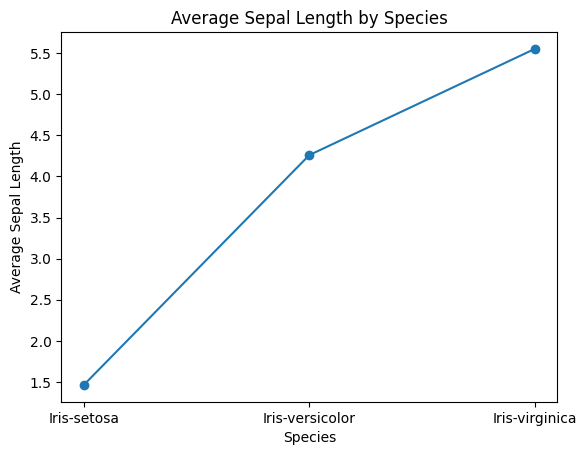

In [17]:
#Produce a line plot showing the average sepal_length for each species. Make sure to properly label your axes and give the plot a title.
species_petal_length = iris.groupby('Species')['PetalLengthCm'].mean().reset_index()
plt.plot(species_petal_length['Species'],species_petal_length['PetalLengthCm'],marker='o')
plt.xlabel('Species')
plt.ylabel('Average Sepal Length')
plt.title('Average Sepal Length by Species')
plt.show()

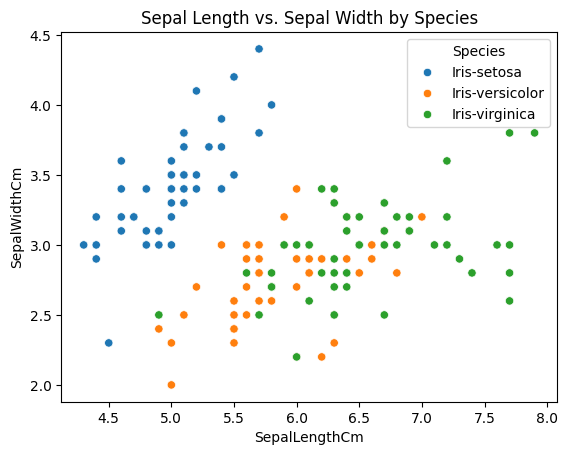

In [19]:
#Using Seaborn, create a scatter plot of sepal_length vs. sepal_width colored by species.
sns.scatterplot(data=iris, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.title('Sepal Length vs. Sepal Width by Species')
plt.show()

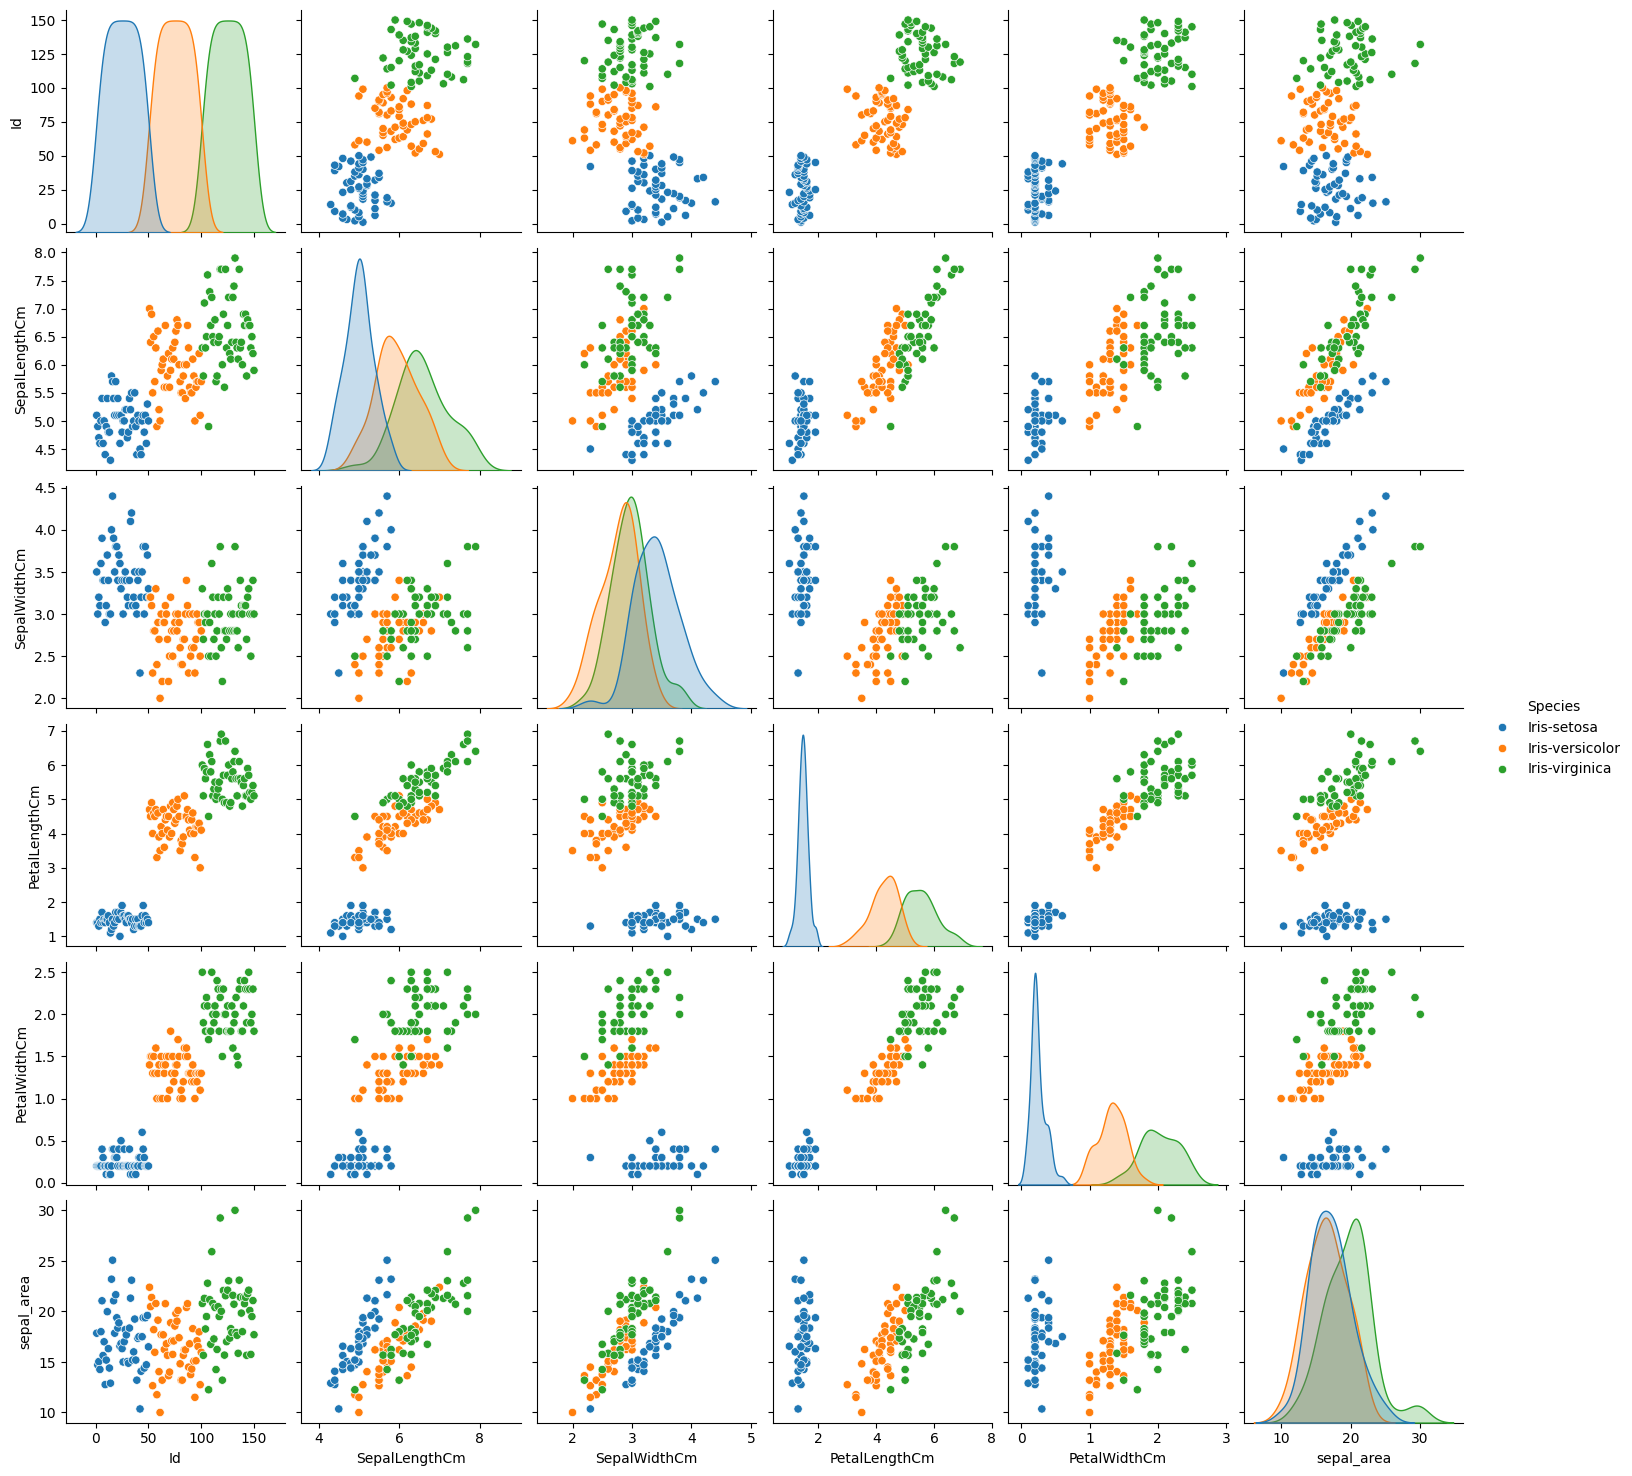

In [21]:
#Generate a pairplot for all numerical columns, colored by species.
sns.pairplot(iris, hue='Species')
plt.show()

In [ ]:
#Advanced Data Manipulation

In [25]:
#Reset the index of the DataFrame and make the index start from 100.
iris.reset_index(drop=True, inplace=True)
iris.index += 100
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_area,sepal_length_category
100,1,5.1,3.5,1.4,0.2,Iris-setosa,17.85,Medium
101,2,4.9,3.0,1.4,0.2,Iris-setosa,14.70,Short
102,3,4.7,3.2,1.3,0.2,Iris-setosa,15.04,Short
103,4,4.6,3.1,1.5,0.2,Iris-setosa,14.26,Short
104,5,5.0,3.6,1.4,0.2,Iris-setosa,18.00,Short


In [26]:
#Filter the dataset to include only rows where the petal_width is greater than 1.5, and then save this filtered dataset to a new CSV file named filtered_iris.csv.
filtered_iris = iris[iris['PetalWidthCm']>1.5]
print(filtered_iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
156   57            6.3           3.3            4.7           1.6   
170   71            5.9           3.2            4.8           1.8   
177   78            6.7           3.0            5.0           1.7   
183   84            6.0           2.7            5.1           1.6   
185   86            6.0           3.4            4.5           1.6   
200  101            6.3           3.3            6.0           2.5   
201  102            5.8           2.7            5.1           1.9   
202  103            7.1           3.0            5.9           2.1   
203  104            6.3           2.9            5.6           1.8   
204  105            6.5           3.0            5.8           2.2   
205  106            7.6           3.0            6.6           2.1   
206  107            4.9           2.5            4.5           1.7   
207  108            7.3           2.9            6.3           1.8   
208  109            

In [ ]:
#Based on the created visualizations, two insights could be:

#1.The scatter plot of sepal_length vs. sepal_width shows distinct clusters for each species, indicating a relationship between these dimensions and the species classification.
#2.The line plot of average sepal_length by species reveals that the average sepal length varies significantly across species, with one species having a noticeably longer sepal on average, which could be useful for classification purposes.